### 트랜스포머 인코더 모델 이해가기 목차

* [Chapter 1 트랜스포머 개요)](#chapter1)
* [Chapter 2 어텐션 메커니즘](#chapter2)
   * [Section 2.1 셀프 어텐션](#section_2_1)
   * [Section 2.2 멀티 헤드 어텐션](#section_2_2)
* [Chapter 3 위치 인코딩과 층 정규화](#chapter3)
* [Chapter 4 트랜스포머 인코더만들기](#chapter4)

### Chapter 1 트랜스포머 개요 <a class="anchor" id="chapter1"></a>
1. 트랜스포머(transformer)는 문장이나 소리 등 순서가 있는 데이터에서 중요한 부분을 자동으로 찾아내 데이터를 처리하는 딥러닝모델

2. 기존 시간적 의존성을 다루기 위해 사용했던 순환신경망(RNN Recurrent Nerual Network)의 순차적인 처리방식과는 다르다.
   - 모든 데이터를(병렬로) 처리해 RNN보다 훨씬 빠르고 효율적으로 학습할 수 있다.

3. 데이터를 이해하는 단계인 인코더와 인코더가 이해한 내용을 바탕으로 결과를 생성하는 디코더 구조로 이루어져 있다.

### Chapter 2 어텐션 메커니즘 <a class="anchor" id="chapter2"></a>
1. 트랜스포머의 핵심은 어텐션(attention)이라는 개념에 있다.

2. 어텐션 메커니즘은 모델에 입력된 데이터의 모든 단어들 중 특정 단어와 관련이 높은 단어에 집중해 데이터를 처리하도록 설계된 기법이다.

3. 셀프 어텐션
   - 문장의 모든 단어가 서로를 참고해 각각 다른 단어와의 관련성을 파악하는 방법

4. 멀티 어텐션
   - 여러 개의 셀프 어텐션을 동시에 수행해 이 관련성을 다양한 관점에서 더욱 깊게 이해할 수 있도록 확장한 방법

5. 인코더-디코더 순환 신경망(RNN)을 사용하던 기계 번역의 성능을 높이기 위해 고안되었다.
   - 기계 번역: 사람이 사용하는 특정 언어를 컴퓨터가 다른 언어로 변환하는 것

6. 기계 번역에서 인코더 RNN은 입력된 문장을 처리하여 최종 은닉상태(hidden state)로 만든다.
   - 문맥 벡터(context vector)라고 부른다.
   - 문맥 벡터는 문장의 중요 정보가 담긴 일종의 요약본이라고 할 수 있다.
   - 순환 신경망(RNN)에서는 싱경망의 층(layer)를 종종 셀(cell)이라고 부른다.
   
     ![문맥 벡터](image/04-01-ContextVector.png)   

7. 긴 문장일수록 번영기 어려울 수 있다.
   - RNN 인코더에 입력되는 텍스트가 길수록 중요한 단어와 덜 중요한 단어가 섞여있다.
   - 문맥 벡터만으로는 오래된 단어의 정보를 기억히기 힘들다.
   - 그래디언트가 여러 타임스텝을 걸져 전파되면서 점점 약해지기 때문이다.
      - 타임스텝: RNN이 하나의 단어를 시간의 순서에 따라 처리하는 과정

8. 어텐션 메커니즘
   - 인코더의 마지막 타임스텝에서 얻은 은닉 상태 참조
   - 인코더의 모든 은닉 상태를  디코더가 텍스트를 생성할 때마다 참조. 
   - 문장에서 특히 중요한 단어들에 더 집중하도록 도와줌으로써 번역의 정확도를 높인다.
   - 디코더는 번역 문장을 만들 때 어떤 단어에 주의(어텐션)을 기울여야할지 결정한다.

      ![어텐션](image/04-01-atteition.png)   

   - 디코더가 '모든' 타임스텝에서 인코더의 은닉 상태를 참고해 문맥 벡터를 만든다.
   - 수식에서 볼 수 있듯이 문맥 벡터는 인코더가 각 타임스템에서 생성하는 모든 은닉 상태의*가중치의 합이다.
      - 디코더는 가중치 a<sub>ij</sub>를 통해 어떤 은닉 상택, 즉 어떤 단어에 주의를 기울일지 정할 수 있다.

      ![어텐션 수식](image/04-01-atteition_math.png)   

   - 인코더의 은닉 상태에 곱해지는 가중치는 아래와 같은 수식을 통해 훈련된다.

      ![수식 학습](image/04-01-atteition_math2.png)

   - 최종적으로 계산된 e<sub>ij</sub>의 결과를 다음과 같은 소프트맥스 함수에 통과시켜 가중치 a<sub>ij</sub>를 얻는다.
      - 소프트맥스 함수를 사용했기 때문에 모든합은 1이 된다.

      ![가중치 수식](image/04-01-atteition_math3.png)

9. 이렇게 인코더의 은닉 상태와 디코더의 은닉 상태를 더하는 어텐션은 논문 발쵸자의 이름을 따서 바흐다나우 어덴션이라고 부른다.
   - 인코더의 출려과 디코더의 출력을 더하기 때문에 덧셈 어텐션, 또는 연결 어텐션이라고 부르기도한다.

10. 루옹 어텐션(Luong attention) / 점곱 어텐션
   - 인코더의 최종 은닉 상태와 디코더의 은닉 상태를 곱하는 방식으로 a<sub>ij</sub>를 계산한다.

      ![점곱 어텐션](image/04-01-atteition_math4.png)

11. 어텐션 메커니즘이 발표된 후 자연어 처리는 순환 신경망에 어텐션을 추가하는 형태로 발전
   - 순환 신경망을 사용하기 때무에 여전히 입력되는 텍스트를 순차적으로 처리해야 했다.

12. 2017년 순환 신경망 없이 어텐션만으로 만드는 인코더-디코더 모델인 트랜스포머가 등장했다. 

      ![트랜스포머 구조](image/04-01-transformer2.png)



#### 2.1 셀프 어텐션 <a class="anchor" id="section_2_1"></a>
1. 기본 어텐션 메커니즘
   - 입력된 문장을 처리한 인코더의 인닉상태와 다음 단어를 출력하기 위한 인커더의 은닉상태를 비교
   - 어떤 단어가 가장 주용한지 어텐션 점수 계산
   - 디코더의 은닉 상태 없이 토큰만으로 어텐션 점수를 계산하기 때문에 셀프 어텐션이라고 부른다.
   - 입력된 문장 속 단어들이 서로 얼마나 중요한지를 계산하는 과정

2. 트랜스포머는 인코더에서 입력 토큰을 임베딩한 벡터만으로 어텐션 점수를 계산한다.
   - 입력 토큰: 모델에 입력하려는 텍스트를 잘게 나눈 단위. 하나의 단어는 한 개 이상의 토큰으로 구성
   - 임베딩: 신경망이 토큰을 처리할 수 있도록 고정크기의 벡터로 변환
   - 임베딩 벡터는 일반적으로 모델의 훈력 과정을 통해 학습되면, 토큰 사이의 관계를 나타낼 수 있다.

3. 셀프 어텐션은 스케일드 점곱 어텐션(Scaled dot-product attention) 방식을 사용한다.
   - 입력의 세 개의 벡터로 변환
      - 입력 토큰의 임베딩을 세 개의 서로 다른 밀집층에 통과시켜 쿼리(Query), 키(Key), 값(Value) 벡터 생성
         - 쿼리: 이 단어가 어떤 정보를 찾고 있는지(계산의 기준)
         - 키: 가지고 있는 정보가 무엇인지(비교의 기준)
         - 값: 이 정보를 제공하면 어떤 결과가 나오는지(식제 정보의 내용)
      - 일반적으로 쿼리, 키, 값의 길이는 토큰의 임배딩의 길이와 동일하다.
   - 벡터 간 관계(유사도) 및 최종 결과 계산
      - 각각의 벡터들이 얼마나 관련이 있는지를 계산하기 위해 쿼리, 키에대한 점곱 수행
      - 점곱 연산이 너무 커지지 않도록 임베팅 길이의 제곱근으로 나눠 스케일링
      - 각 단어의 계산된 중요도를 확률처럼 확인할 수 있도록 소프트맥스 함수를 통화시켜 합이 1이 되도록 정규화
         - 소트맥스 함수를 통화한 점수를 어텐션 가중치라고 부르기도한다.
      - 어텐션 점수와 값 벡터를 곱한다.

4. 밀집층의 가중이 W<sub>g</sub>, W<sub>k</sub>, W<sub>q</sub>는 모델이 훈련될 때 역전파를 통해 학습되는 파라미터이다.

      ![셀프 어텐션](image/04-01-selfAttention.png)


In [3]:
import keras
from keras import layers

# n_batch: 배치 크기, n_token: 토큰의 개수, embded_dim: 토큰 임베팅 크기, att_dim: 쿼리 벡터크기
def self_attention(inputs, att_dim):
    # (n_batch, n_token, embded_dim) 크기의 inputs를 세 개의 Dense층에 통과
    # (n_batch, n_token, att_dim) 크기의 쿼리, 키, 값 생성
    # Dense층에는 (embed_dim, n_token) 크기의 가중치와 (att_dim) 크기의 절편이 있다.
    query = layers.Dense(att_dim)(inputs)
    key = layers.Dense(att_dim)(inputs)
    value = layers.Dense(att_dim)(inputs)
    
    # transpose() 함수를 사용해 키를 전치한다.
    #   - axes=(0, 2, 1) : 전치할 때 배치 차원을 제외하고 나머지 두 차원 변경
    key_t = keras.ops.transpose(k, axes=(0, 2, 1))
    
    # 행렬 곱셈을 통해 쿼리와 키의 전치를 곱한 후 att_dim의 제곱근으로 나눈다.
    query_key_dot = keras.ops.matmul(query, key_t) / keras.ops.sqrt(att_dim)
    
    # 소프트맥스 함수를 통화시켜 어텐션 가중치를 얻는다.
    score = keras.activations.softmax(query_key_dot)
    
    # 어텐션 가중치와 값을 곱해 최종 어텐션 점수 반환
    return keras.ops.matmul(score, value)

#### 2.2 멀티 헤드 어텐션 <a class="anchor" id="section_2_2"></a>
1. 여러 개의 어텐션 헤드를 실행해서 서로 다른 관점에서 단어 간의 중요도를 계산한다.
    - 각각의 헤드가 독립적으로 셀프어텐션을 실행하고, 각 헤드에서 계산된 출력을 하나로 연결
    - 하나로 연결된 멀티 헤드 어텐션의 결과를 밀집층에 통과시켜 원본 임베딩 크기로 변환

2. 트랜스포머의 핵심의 핵심기능으로  케라스에서 MultiHeadAttention를 통해제공
   - 매개변수 num_heads:  어텐션 헤드의 개수를 지정
   - 매개변수 key_dim: 키 벡터의 차원을 결정

3. 쿼리의 값의 크기와 키 값의 크기는 동일.
   - 값 벡터의 크기를 따로 지정하려면 value_dim 매개변수 사용

4. 쿼리, 키, 값의 크기는 입력의 크기(20) / 헤드 개수(4) 를 사용하는 경우가 많다.

    ![멀티 헤드 어텐션](image/04-01-multiAttention.png)

5. 3차원 이상의 텐서 사이의 행렬 곱 
    * 참조 (https://bowbowbow.tistory.com/27)

In [5]:
import keras
from keras import layers

# 10: 토큰 개수, 20: 토큰 임베딩 크기
inputs = keras.Input(shape=(10,20))

# 쿼리, 키, 값의 크기(5)는 일반적으로 입력(20) / 헤드 개수(4)
# query=inputs, value=inputs: 한 시킨스 안에 있는 토큰 사이의 관계를 분석하기 위해 쿼리와 값에 동일한 변수 설정
x = layers.MultiHeadAttention(num_heads=4, key_dim=5)(query=inputs, value=inputs)

model = keras.Model(inputs,x)

# (10, 20) 크기의 입력이 세 개의 밀집층으로 들어가 (10, 5) 크기의 쿼리, 키, 값이 된다.
#   - 10: 토큰 개수, 20: 토큰 임베딩 크기
# 밀집층에 (토큰 임베딩 크기, 쿼리/키/값 크기) 값이 전달된다. ->  (20, 5), 절편 크기 (5,)
# 세 개의 밀집층의 총 가중치는
#   - (20 * 5 + 5) * 3 = 315
# 이런 어텐션 헤드가 4개 이므로 315 * 4 = 1,260
# (10, 5) 크기의 어텐션 헤드 네 개의 출력을 연결한 (10,20) 크기의 입력을 받아 (10, 20)의 출력을만드는 밀집층 통과
#   - 밀집층 가중치치 크기 (20, 20) 절편 (20, )
#   - 1,260 + (20 * 20) + 20 = 1,680 
model.summary();

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 20)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 20)    │      1,680 │ input_layer_1[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,680 (6.56 KB)

 Trainable params: 1,680 (6.56 KB)

 Non-trainable params: 0 (0.00 B)

5. 어텐션 헤드의 밀집층에 2차원 입력 전달가능
   - 케라스의 밀집층에 2차원 이사으이 입력을 전달하면 입력의 미지막 차원을 따라 점곱 연산을 수행한다.
   - 유닛 개수 8인 밀집층에 (10, 20) 크기의 입력이 전달되면 (20, 8)크기의 가중치를 사용해 (10, 8) 크기의 출력을 만든다.
      * 참조 (https://angeloyeo.github.io/2020/09/08/matrix_multiplication.html)

      ![점곱연산](image/04-01-dotproduct.png)

   - 밀집층에 (10, 20) 크기의 입력을 전달하면 (20, 4, 5) 크기의 가중치를 곱해 (10, 4, 5) 크기의 쿼리, 키, 값을 만든다.
      - 4: 어텐션 헤드의 개수, 밀집응 절편의 크기 (4, 5)
   - 스케일드 점곱 어텐션을 통화한 다음에는 다시 원본 임베딩 크리고 변환하는 밀집층을 거친다.
      - 밀집층에서 (10, 4, 5)크기 입력에 가중치를 곱해서 (10, 20, ) 출력을 만든다.
      - 밀집층의 절편크기는 20
      

### Chapter 3 위치 인코딩과 층 정규화 <a class="anchor" id="chapter3"></a>
1. 어텐션은 순서를 고려하지 않아 단어가 등장하는 위치나 순서를 이해하기 어렵다.

2. 밀집층에서 연산 과정을 반복하다 보면 계산된 값이 너무 커지거나 작어질 수 있다.

3. 순서 정보 더하기 - 위치 인코딩
   - 순환 신경망처럼 토큰이 순서대로 입력되지 않기 때문에 토큰과 토큰 사이의 거리를 감지하지 못한다.
   - "I love you because you love me"라는 문장에 대하여 나를 사랑하는 사람이 누구냐고 질문
      - 두 번째 위치에 있는 "love"에 주위를 기울여야 하지만 첫 번째 "love"와 차이를 나타내기 어렵다.
   - 위치 인코딩(PE: Positional Encoding): 단어의 순서에 대한 정보를 보안하기 위해 토큰 임베딩에 추가하는 값으로 두 단어사이의 차이를 만든다.
   - 요즘에는 사용하지 않는다.

4. 삼각함수를 사용해 토큰의 위치 정보를 만든다.
   - 삼각함수를 사용하면 벡터화된 위치를 쉽게 계산할 수 있다.
      - 1  ~ -1 사이의 값을 갖도록한다.
   - p번째 토큰의 임베딩에 d 길이의 위치 인코딩을 추가하는 경우
      - 짝수와 홀수 두 가지 형태로 정의
      - 짝수 위치는 sin 함수, 홀수 위치는 cos 함수 사용
      - 수식에서 i는 0 ~ d 사이의 짝수

      ![토큰위치](image/04-01-tokenPosition.png)

   - 위치 인코딩은 각 토큰의 임베딩에 더해지기 때문에 일반적으로 토큰 임베딩의 길이와 동일하게 위치 인코딩의 길이(d)가 결정된다.
   - 최근에는 삼각함수 대신에 위치 정소를 임베딩층에 통과시켜 위치 임베딩을 만드는 방법이 많이 사용된다.


      * 삼각함수 참조(https://blog.naver.com/semomath/222939867201)

         ![삼각함수](image/04-01-Trigonometric.png)

      * 삼각함수 참조(https://blog.naver.com/semomath/222941747836)

         ![삼각함수](image/04-01-Trigonometric2.png)

         ![삼각함수](image/04-01-Trigonometric3.png)

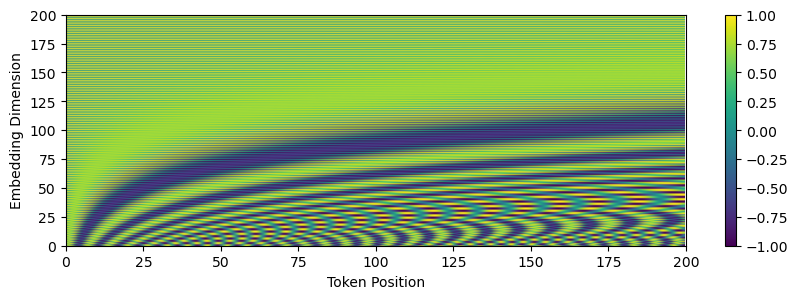

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 임베딩 차원 500
d = 500

# 토큰 개수 200
n_token = 200

# (500,200) 크기의 빈 넘파이배열 생성
pos_encoding = np.zeros((d,n_token))

# 두 개의 반복문을 사용해 각 토큰마다 0~d 사이의 짝수를 순회하면서 위치 인코딩 값을 채운다.
for pos in range(n_token):
    # 0부터 498까지 2씩 증가하며 반복
    for i in range(0, d, 2):
        # 짝수 번째 행에는 사인 함수적용
        # pos: 위치 인덱스, i: 임베딩 차원 인덱스
        # 10000 ** ((2 * i)/d) : 주기 조절
        pos_encoding[i, pos] = np.sin(pos / (10000 ** ((2 * i)/d)))
        
        # 홀수 번째 행에는 코사인 함수 적용
        # i + 1: 홀수 번째 행 인덱스
        # pos: 위치 인덱스, i: 임베딩 차원 인덱스
        # 10000 ** ((2 * (i + 1))/d) : 주기 조절
        pos_encoding[i + 1, pos] = np.cos(pos / (10000 ** ((2 * (i + 1))/d)))

# 생성된 위치 인코딩 시각화
# figsize: 그래프 크기 설정
plt.figure(figsize=(10,3))

# imshow(): 행렬을 이미지로 표현
# interpolation: 보간법 설정 (여기서는 'quadratic' 사용)
#   - quadratic: 2차 함수를 사용하여 픽셀 사이를 보간한다.
#      - 작은 이미지를 크게 확대할 때 보간법을 사용
#      - 기존 픽셀 값 사이의 적절한 값을 계산하면 픽셀들이 모자이크 처럼보이는 현상을 방지할 수 있다. 
# aspect: 이미지의 가로세로 비율 설정 (여기서는 'auto'
#  - auto: 자동으로 비율 조정
plt.imshow(pos_encoding, interpolation='quadric', aspect='auto')

# axis(): x축과 y축의 범위 설정
#   - [0, n_token, 0, 200]: x축은 0부터 n_token(200), y축은 0부터 200까지
plt.axis([0, n_token, 0, 200])

# x축 라벨 설정
plt.xlabel('Token Position')  

# y축 라벨 설정
plt.ylabel('Embedding Dimension')  

# colorbar(): 색상 막대 표시
plt.colorbar()

# 0~200 사이의 토큰이 모두 다른 위치 인코딩을 가진다는 것을 알 수 있다.
# 이러한 각각의 위치 인코딩을 토큰의 임베딩에 더하여 멀티 헤드 어텐션의 입력으로 사용한다.
# 위치 임베딩: 최근에는 위치 인코딩 대신에 생성위치 인코딩 대신에 훈련을 통해 정수 위치에 해당하는 인코딩을 모델이 학습하는 방법을 사용한다.
plt.show()

In [13]:
# 위치 임베딩
vocab_size = 10000  # 어휘 사전 크기
embed_dim = 768   # 토큰 임베딩 크기
max_seq_len = 512  # 최대 입력 시퀀스 길이

inputs = keras.Input(shape=(None,))

# Embedding 층을 사용해 입력토큰을 (n_batch, n_token, embed_dim) 크기의 토큰 임베딩으로 변환
token_embedding = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(inputs)

# 입력 토큰의 길이만큼 정수 인덱스를 생성한다.
token_pos = keras.ops.arange(n_token)

# 토큰 임베딩과 유사하게 Emgedding 클래스로 토큰 위치를 위치 임베딩으로 변환
# (n_batch, n_token, embed_dim) 크기의 위치 임베딩 생성
pos_embedding = layers.Embedding(input_dim=max_seq_len, output_dim=embed_dim)(token_pos)

# 토큰 임베딩과 위치 임베딩을 더한다.

6. 층 정규화(Layer Normalization)
   - 각 샘플의 특성을 정규화한다.
   - 텍스트 시퀴스에 있는 토큰마다 정규화를 진행한다.
   - 시퀸스를 기반으로하는 자연어 처리 작업에 더 적합하다.

In [14]:
data = np.arange(12, dtype=np.float32).reshape(2, 2, 3)
print(data)

[[[ 0.  1.  2.]
  [ 3.  4.  5.]]

 [[ 6.  7.  8.]
  [ 9. 10. 11.]]]


In [ ]:
# 층 정규화
batchnorm = layers.BatchNormalization()

# training=True: 훈련 모드에서만 층 정규화 적
# 마지막 차원의 0, 3, 6, 9가 -1.34. -0.45, 0.45, 1.34으로 정규화된다.
#   - 모든 샘프과 모든 토큰에 있는 첫 번째 특성을 정규화한다.
print(batchnorm(data, training=True).numpy()) 

[[[-1.3415811  -1.3415811  -1.3415811 ]
  [-0.44719368 -0.44719374 -0.44719374]]

 [[ 0.44719374  0.44719374  0.44719374]
  [ 1.3415811   1.341581    1.3415812 ]]]


In [ ]:
temp = np.array([0, 3, 6, 9])

# 정규화를 수종으로 진행하면 유사한 결과를 얻을 수 있다.
(temp - np.mean(temp)) / (np.sqrt(np.var(temp) + 1e-3))

array([-1.34158116, -0.44719372,  0.44719372,  1.34158116])

In [ ]:
# 층 정규화
layernorm = layers.LayerNormalization()

# 0, 1, 2가  -1.22, 0, 1.22로 정규화된다.
print(layernorm(data).numpy())

[[[-1.2238274  0.         1.2238274]
  [-1.2238274  0.         1.2238274]]

 [[-1.2238274  0.         1.2238274]
  [-1.2238274  0.         1.2238274]]]


In [18]:
temp = np.array([0, 1, 2])

# 정규화를 수종으로 진행하면 유사한 결과를 얻을 수 있다.
(temp - np.mean(temp)) / (np.sqrt(np.var(temp) + 1e-3))


array([-1.22382734,  0.        ,  1.22382734])

7. 패딩 토큰
   - 입력 데이터의 길이를 동일하게 맞추기 위해 사용되는 빈자리 표시
   - 3개의 단어로 구성된 문장과 5개의 단어로 구성된 문장입력
      - 더 짧은 문장에 패딩 토큰을 추가해 길이를 맞춘다.
   - 패딩 토큰은 의미가 없는 빈자리이기 때문에 어텐션 계산에서 제외된다.
   - 패딩 마스크를 사용해 패딩 토큰을 무시하고 실제 단어에 대해서만 어텐션을 계산한다.
      - 유효한 단어 1로 패딩 토큰을 0으로 나타내 패딩토큰을 무시한다.


### Chapter 4 트랜스포머 인코더만들기 <a class="anchor" id="chapter4"></a>
1. 트랜스포머 인코더는 위치 인코딩으로 문장의 순서를 파악하고, 멀티 헤드 셀프 어텐션으로 문장 내 단어들 간의 관계를 이해한다.

2. 층 정규화를 거쳐 트랜스포머가 최종 결과를 예측하는 데 중요한 역할을 하는 벡터를 생성한다.

3. 멀티 헤드 어텐션층 다음에는 과대적합을 막기 위해 훈련 단계에서 뉴런 일부를 무작위로 비활성화 하는 드롭아웃층이 놓인다.

4. 드롭아웃층의 출력은 어텐션 입력과 더해져(스킵 연결) 층 정규화를 통과한다.

5. 피드 포워드 네트워크라고 부르는 두 개의 밀집층이 층 정규화 다음에 놓인다.
   - 첫 번째 밀집층: 입력 벡터의 차원을 확장하는 단계로, 렐루 활성화 함수 사용
   - 두 번째 밀집층: 다시 원본 크기로 차원을 줄이는 단계로, 활성화 함수는 사용하지 않는다.

   ![문맥 벡터](image/04-01-transformer3.png) 

In [ ]:
def transformer_encoder(x, padding_mask, dropout, activation='relu'):
     residual = x
     key_dim = hidden_dim // num_heads
     
     # 배치에 있는 샘플 시퀸스 길이가 다른 경우, 짧은 시퀴스에 0 패딩을 추가하여 동일하게 맞춤
     # padding_mask: 0 패딩을 무시하기 위해 1과 0으로 이루어진 마스크
     x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(query=x, value=x, attention_mask=padding_mask)
     
     # 잔차 드롭아웃: 스킵 연결 직전에 통과하는 드롭아웃 층
     x = layers.Dropout(dropout)(x)
     
     # 스킵 연결: 입력을 출력에 더해줌
     x = x + residual
     x = layers.LayerNormalization()(x)
     residual = x
     
     # 두 개의 밀집층으로 이루어진 피드 포워드 신경망
     x = layers.Dense(hidden_dim * 4, activation=activation)(x)
     x = layers.Dense(hidden_dim)(x)
     x = layers.Dropout(dropout)(x)
    
     x = x + residual
     x = layers.LayerNormalization()(x)
     return x